#### **Lab 7: Quadratic Spline Interpolation**

In this lab we will explore interpolation using quadratic splines. We will only explore the case where the first segment is linear. We will not consider other cases in aero 222. For other cases we will have to assemble and solve a set of simultaneous equations. When we implement the cubic spline, we will be assembling simultaneous equations.

In this lab we will be practicing on the set of data:

$x = [1,2,3,4,5,6]$

$y = [0,4,5,12,14,8]$

The arrays are initialized and plotted below. The data point are plotted as filled circles and are joined with straight lines. This is a linear spline interpolation. 

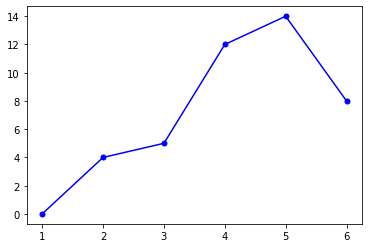

In [ ]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5,6],dtype = float)
y = np.array([0,4,5,12,14,8],dtype = float)

plt.plot(x,y, 'bo-', markersize=5);

#### **1. Translating the Equation to Code**

Given the expression for a quadratic segment as:

$y(x) = y_i+m_ix+\frac{y_{i+1}-y_i-m_ih_i}{h_i^2}x^2$

where $y_i$ and $y_{i+1}$ are the y values of the points at the left and right ends of the current segment respectively, $m_i$ is the slope at the left end of the segment which is equal to the slope at the right end of the previous segment, and $h_i$ is the step size, or the $x$ distance between the two points given by:

$h_i = x_{i+1}-x_i$

Create a function in python that accepts the inputs $x$, $h$, $m_i$, $y_i$, and $y_{i+1}$ and returns the segments's evaluation at $x$.

In [ ]:
def ySpline(x,mi,h,yi,yip1):
    #Evaluate the segment at local coordinate x
    #mi = slope at left end of segment
    y  =  yi + mi*x + (yip1 - yi - mi*h)/(h**2) * x**2
    return y

#### **2. The First Segment**

You may have noticed that for the first segment, there is no slope at the end of the previous segment $m_i$. To work around this, we make the assumption that the first segment is linear, i.e. of the form:

$y(x) = y_i + m_ix$

where

$m_i = \frac{y_{i+1}-y_i}{x_{i+1}-x_i}$

By hand, substitute the above expression for $m_i$ and the expression for $h_i$ into the equation $y(x)$ given in part 1. What happens to the quadratic term $x^2$? 

In code, evaluate the first spline segment using your function from part 1 at each of the end points and check that it returns the y values that you expect. Remember that we are still in local coordinates so to evaluate at the end points we need to evaluate at $x = 0$ and $x = h$

In [ ]:
print('Segment 0')
i = 0

#define the slope of the segment
mi = (y[i+1]-y[i])/(x[i+1]-x[i]);

#get the y values at the endpoints of the segment
yi = y[i]
yip1 = y[i+1]

#define the step size
h= x[i+1] - x[i]

#evaluate
y0 = ySpline(0, mi, h, yi, yip1)
print('y(',0,') = ', y0)

y1 = ySpline(h , mi, h, yi, yip1)
print('y(',h,') = ', y1)

Segment 0
y( 0 ) =  0.0
y( 1.0 ) =  4.0


#### **3. The Second and Third Segments**

Check your function by using it to calculate the values at the ends of the next two segments. Start with the second segment and use the slope $m_i$ that we defined in part 2. After the second segment has been evaluated, redefine the variable $m_i$ to be the slope at the end of the second segment, etc.  

In [ ]:
print('Segment 1')
i = 1

#get the y values at the endpoints of the segment
yi = y[i]
yip1 = y[i+1]

#define the step size
h= x[i+1] - x[i]

#evaluate
y0 = ySpline(0, mi, h, yi, yip1)
print('y(',0,') = ', y0)

y1 = ySpline(h , mi, h, yi, yip1)
print('y(',h,') = ', y1)

print('\n')

print('Segment 2')

#Redefine mi to be the slope at the end of the last segment
mi = (y[i+1]-y[i]-mi+h/2*mi)*2/h; 

i = 2


#get the y values at the endpoints of the segment
yi = y[i]
yip1 = y[i+1]

#define the step size
h= x[i+1] - x[i]

#evaluate
y0 = ySpline(0, mi, h, yi, yip1)
print('y(',0,') = ', y0)

y1 = ySpline(h , mi, h, yi, yip1)
print('y(',h,') = ', y1)

Segment 1
y( 0 ) =  4.0
y( 1.0 ) =  5.0


Segment 2
y( 0 ) =  5.0
y( 1.0 ) =  12.0


#### **4. Plot All Three Segments**

Plot all three segments on the same plot from $0$ to $h$

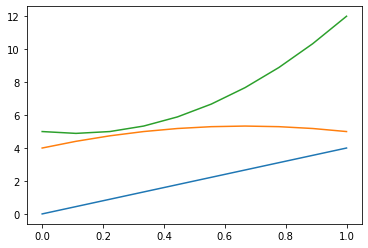

In [ ]:
i = 0

#define the slope of the segment
mi = (y[i+1]-y[i])/(x[i+1]-x[i]);

#get the y values at the endpoints of the segment
yi = y[i]
yip1 = y[i+1]

#define the step size
h= x[i+1] - x[i]

#get a vector of x values
xVals0 = np.linspace(0,h,10)

#evaluate
yVals0 = ySpline(xVals0, mi, h, yi, yip1)
plt.plot(xVals0,yVals0)

i = 1

#get the y values at the endpoints of the segment
yi = y[i]
yip1 = y[i+1]

#define the step size
h= x[i+1] - x[i]

#get a vector of x values
xVals1 = np.linspace(0,h,10)

#evaluate
yVals1 = ySpline(xVals1, mi, h, yi, yip1)
plt.plot(xVals1,yVals1)


#Redefine mi to be the slope at the end of the last segment
mi = (y[i+1]-y[i]-mi+h/2*mi)*2/h; 

i = 2


#get the y values at the endpoints of the segment
yi = y[i]
yip1 = y[i+1]

#define the step size
h= x[i+1] - x[i]

#get a vector of x values
xVals2 = np.linspace(0,h,10)

#evaluate
yVals2 = ySpline(xVals2, mi, h, yi, yip1)
plt.plot(xVals2,yVals2)


#### **5. Plot All Three Segments With the Proper Offsets**

Try plotting them again, but shift the $x$ values for each set to their global location by adding $x_i$ to each element in each individual x values array.

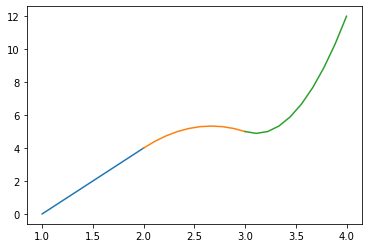

In [ ]:
plt.plot(xVals0 + x[0],yVals0)
plt.plot(xVals1 + x[1],yVals1)
plt.plot(xVals2 + x[2],yVals2)

#### **6. Let's Loop Over all Segments**

Lets automate the process by using a for loop that loops though all of the segments. Before we begin coding, consider the following questions.

1.   For a data set with $n$ points, how many segments will there be?
2.   Which of our varibales do we need to initiallize before the loop starts?
3.   What should each of the initiallized variables be initiallized to?
4.   When in our loop should we calculate a new value of $m_i$

Create a for loop that plots the entire spline function for our data points. 

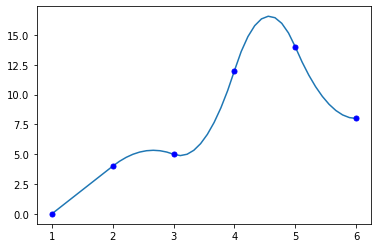

In [ ]:
#set the number of segments to be calculated
numSeg = len(x)-1

#init X and Y for plotting purposes later
X = [ ]; Y = [ ]

#init the first mi 
mi = (y[1]-y[0])/(x[1]-x[0])

for i in range(numSeg):
    yi = y[i]
    yip1 = y[i+1]  
    h= x[i+1] - x[i]

    xLocal = np.linspace(0, h, 10); #print(xLocal)

    tmp = ySpline(xLocal,mi,h,yi,yip1); 
    X = np.append(X, xLocal + x[i])
    Y = np.append(Y, tmp)
    
    #pass forward the slope at the end of the current segment
    mi = (y[i+1]-y[i]-mi+h/2*mi)*2/h 

    
plt.plot(X,Y)
plt.plot(x,y, 'bo', markersize=5)   #Just show the points

#### **7. Putting Our Code Into a Function**

Lets make this into a function that accepts an array of $x$ and $y$ values and returns a plot of the datapoints and the spline interpolation.

Hint: Your code from the previous section can be converted very easily to a function in just a few lines of code. 

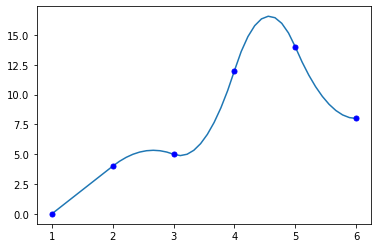

In [ ]:
def myQuadraticSplinePlot(x,y):
  #set the number of segments to be calculated
  numSeg = len(x)-1

  #init X and Y for plotting purposes later
  X = [ ]; Y = [ ]

  #init the first mi 
  mi = (y[1]-y[0])/(x[1]-x[0])

  for i in range(numSeg):
    yi = y[i]
    yip1 = y[i+1]  
    h= x[i+1] - x[i]

    xLocal = np.linspace(0, h, 10); #print(xLocal)

    tmp = ySpline(xLocal,mi,h,yi,yip1); 
    X = np.append(X, xLocal + x[i])
    Y = np.append(Y, tmp)
    
    #pass forward the slope at the end of the current segment
    mi = (y[i+1]-y[i]-mi+h/2*mi)*2/h 

    
  plt.plot(X,Y)
  plt.plot(x,y, 'bo', markersize=5)   #Just show the points

myQuadraticSplinePlot(x,y)